In [ ]:
import numpy as np
import cv2
img=cv2.imread("/content/demon-slayer-1068x597.jpeg")

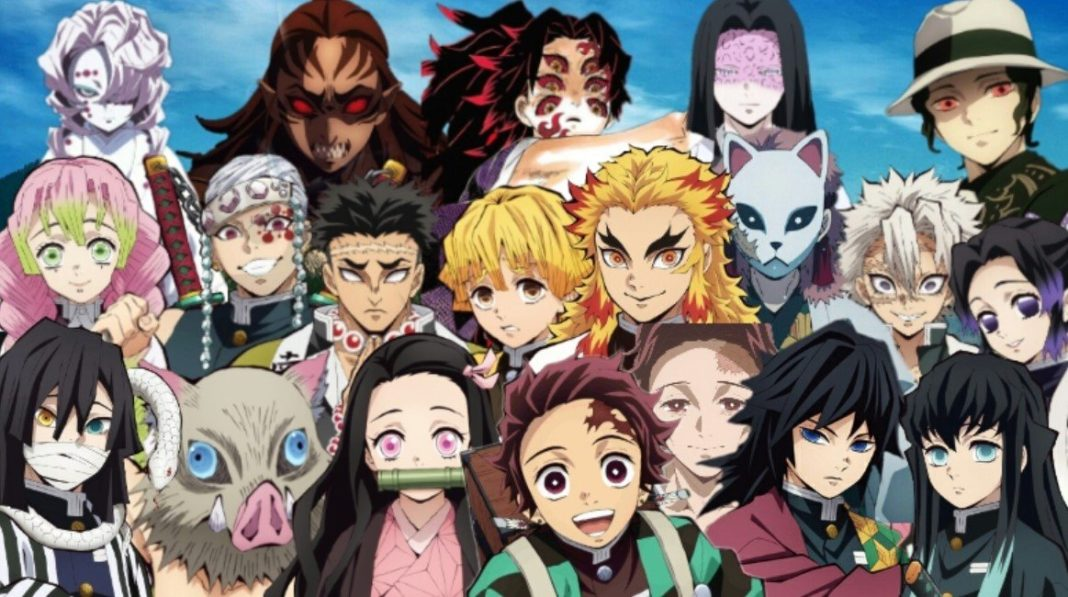

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

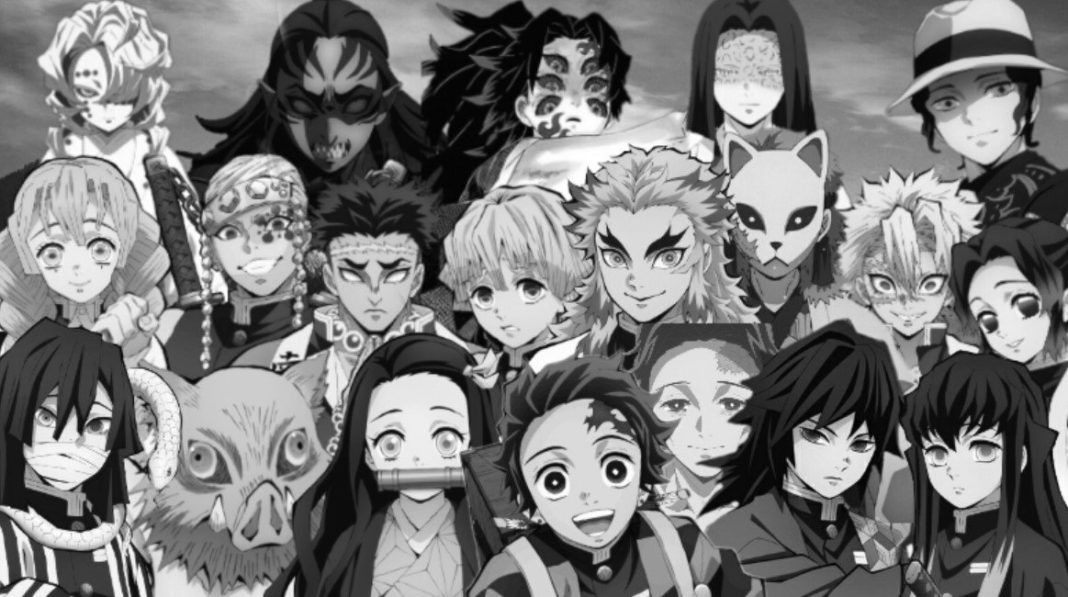

In [ ]:
img0=cv2.imread("/content/demon-slayer-1068x597.jpeg",0)
cv2_imshow(img0)

In [ ]:
cv2.imwrite("Save_img.png",img0)

True

imutals

In [ ]:
import imutils


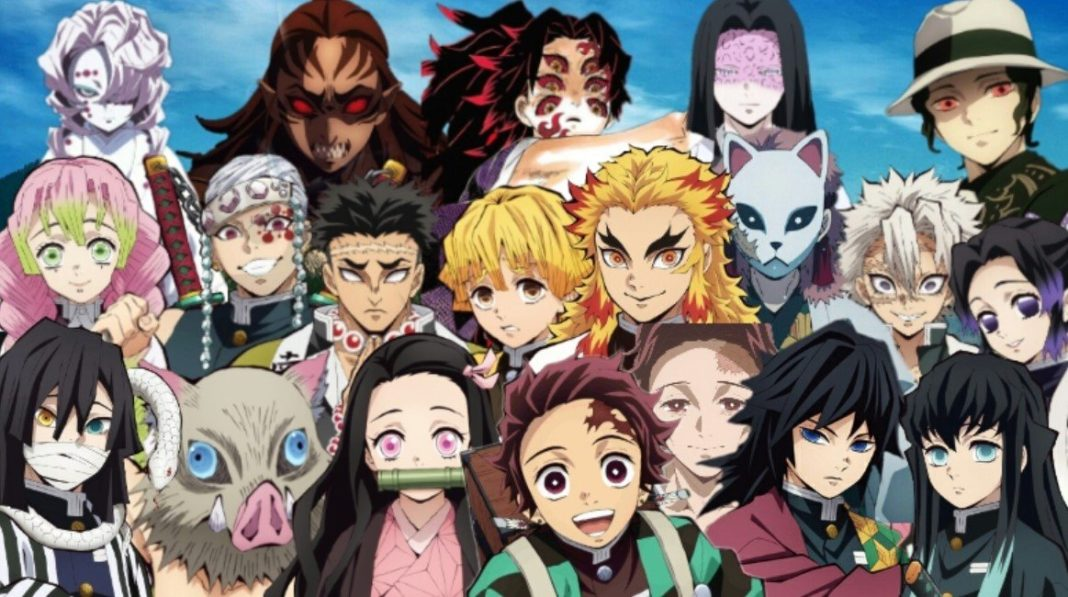

In [ ]:
translated = imutils.translate(img, 0, 0)
cv2_imshow(translated)

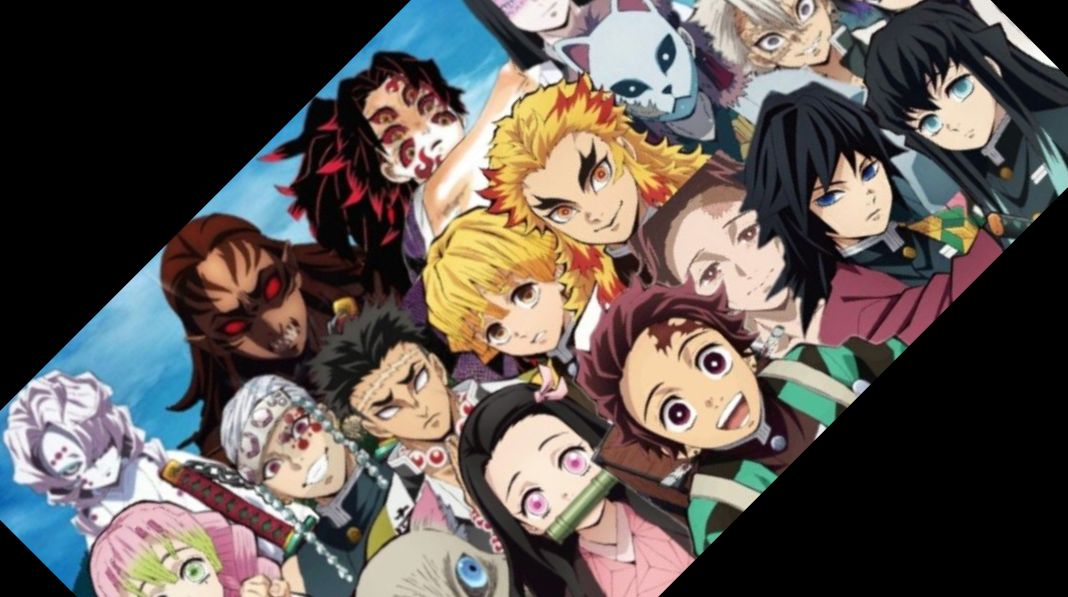

In [ ]:
rotated = imutils.rotate(img,45)
cv2_imshow(rotated)

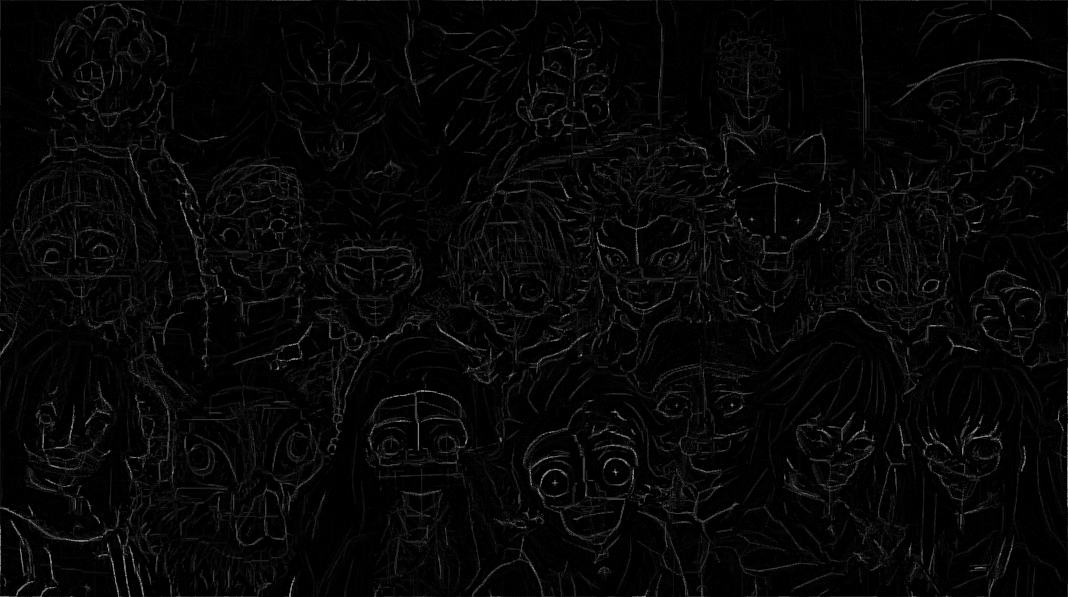

In [ ]:
from google.colab.patches import cv2_imshow
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
skeleton = imutils.skeletonize(gray, size=(3, 3))
cv2_imshow(skeleton)

400 223


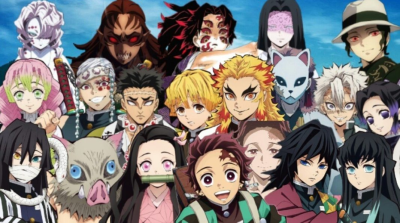

In [ ]:
image_file ="/content/demon-slayer-1068x597.jpeg"
image = cv2.imread(image_file)
image = imutils.resize(img, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt


--2022-09-12 09:20:17--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2022-09-12 09:20:17 (14.6 MB/s) - ‘deploy.prototxt’ saved [28104/28104]



In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-09-12 09:20:20--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10666211 (10M) [application/octet-stream]
Saving to: ‘res10_300x300_ssd_iter_140000.caffemodel’

res10_300x300_ssd_i 100%[===================>]  10.17M  --.-KB/s    in 0.07s   

Last-modified header missing -- time-stamps turned off.
2022-09-12 09:20:20 (149 MB/s) - ‘res10_300x300_ssd_iter_140000.caffemodel’ saved [10666211/10666211]



In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


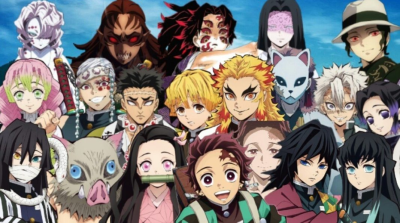

In [ ]:
image = imutils.resize(img, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
cv2_imshow(image)

In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [ ]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

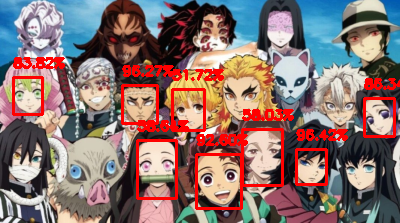

In [ ]:
cv2_imshow(image)